In [3]:
import os
imp
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), "../"))

In [4]:
from utils.utils import *
import torch
import torchvision
from utils.xy_dataset import XYDataset
import pandas as pd
import sys
import math
import seaborn as sns

def distance_euclidienne_xy(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

def distance_euclidienne_only_x(x1, x2):
    return abs(x2 - x1)

#Function to predict the apex in a given image with the model specified
def predict_apex(image, model):
    dim = (256, 256)
    img = cv2.imread(image)

    # Redimensionner l'image
    # img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    #Apply model
    preprocessed = preprocess(img)
    output = model(preprocessed).detach().cpu().numpy().flatten()
    
    #recalculate coordinates
    x = int(dim[0]* (output[0] / 2.0 + 0.5))
    y = int(dim[1]* (output[1] / 2.0 + 0.5))
    
    return x,y

def predict_apex_only_x(image,model):
    dim = (256, 256)
    img = cv2.imread(image)

    # Redimensionner l'image
    # img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    #Apply model
    preprocessed = preprocess(img)
    output = model(preprocessed).detach().cpu().numpy().flatten()
    
    #recalculate coordinates
    x = int(dim[0]* (output[0] / 2.0 + 0.5))
    #y = int(dim[1]* (output[1] / 2.0 + 0.5))
    
    return x#,y

ModuleNotFoundError: No module named 'utils'

In [16]:
def loading_data_model(model_file, output_dim_model):
    #Loading the parameters needed
    #model_file, TASK, CATEGORIES = sys.argv[1:4]
    #model_file = "models/xy.pth"
    TASK = "data/test/"
    CATEGORIES = 'apex'

    #Loading the model
    model = torchvision.models.resnet18(pretrained=True)
    model.fc = torch.nn.Linear(512, output_dim_model)
    model.load_state_dict(torch.load(model_file))


    #Loading the dataset
    CATEGORIES = [CATEGORIES] # Adapt to the right format, list exigée
    print(TASK)
    TRANSFORMS = transforms.Compose([
        transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    #dataset = XYDataset(TASK , CATEGORIES, TRANSFORMS, random_hflip=True)
    test_dataset = XYDataset(TASK , CATEGORIES, TRANSFORMS, random_hflip=True)

    print(len(test_dataset.annotations), " elements in the test dataset")

    return test_dataset, model

# Repartition of x prediction with xy model (0 : apex)

data/test/
110  elements in the test dataset


<AxesSubplot:ylabel='Count'>

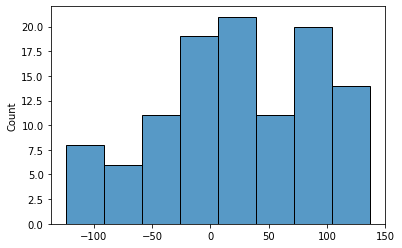

In [17]:
test_dataset, model = loading_data_model("models/xy.pth", 2)
distances = []
for item in test_dataset.annotations:
    a = np.array((item['x']))
    b = np.array(predict_apex_only_x(item['image_path'], model))
    distances.append(a-b)

sns.histplot(distances)

# Repartition of x prediction with xy augmented model (0 : apex)

data/test/
110  elements in the test dataset


<AxesSubplot:ylabel='Count'>

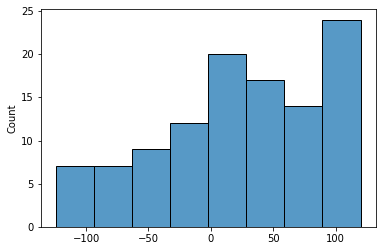

In [18]:
test_dataset, model = loading_data_model("models/xy_augmented.pth", 2)
distances = []
for item in test_dataset.annotations:
    a = np.array((item['x']))
    b = np.array(predict_apex_only_x(item['image_path'], model))
    distances.append(a-b)

sns.histplot(distances)

# Repartition of x prediction with only x model (0 : apex)

data/test/
110  elements in the test dataset


<AxesSubplot:ylabel='Count'>

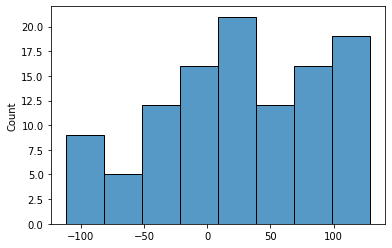

In [19]:
test_dataset, model = loading_data_model("models/x.pth", 1)
distances = []
for item in test_dataset.annotations:
    a = np.array((item['x']))
    b = np.array(predict_apex_only_x(item['image_path'], model))
    distances.append(a-b)

sns.histplot(distances)

# Repartition of x prediction with only x augmented model (0 : apex)

data/test/
110  elements in the test dataset


<AxesSubplot:ylabel='Count'>

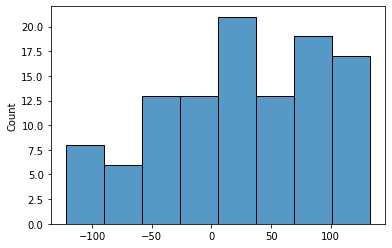

In [20]:
test_dataset, model = loading_data_model("models/x_augmented.pth", 1)
distances = []
for item in test_dataset.annotations:
    a = np.array((item['x']))
    b = np.array(predict_apex_only_x(item['image_path'], model))
    distances.append(a-b)

sns.histplot(distances)